![SOM](https://pbs.twimg.com/media/FczksoAWYAIl0NT?format=jpg&name=medium)

The Self Organizing Map is one of the most popular neural models. It belongs to the category of the competitive learning network. The SOM is based on unsupervised learning, which means that is no human intervention is needed during the training and those little needs to be known about characterized by the input data. We could, for example, use the SOM for clustering membership of the input data. The SOM can be used to detect features inherent to the problem and thus has also been called SOFM the Self Origination Feature Map. <br>
[Click to see my article on SOM](https://medium.com/machine-learning-researcher/self-organizing-map-som-c296561e2117)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Import Dataset and Feature Scaling</font>
In this part, we import required libraries and dataset. The dataset is aboutcredit card applications. All attribute names and values have been changed to meaningless symbols to protect the confidentiality of the data.
This dataset is interesting because there is a good mix of attributes — continuous, nominal with small numbers of values, and nominal with larger numbers of values.

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue>Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### <font color = blue> Import the dataset

In [3]:
dataset=pd.read_csv('Dataset/Credit_Card_Applications.csv')
X=dataset.iloc[:,:-1].values  # Predictor attributes
Y=dataset.iloc[:,-1].values   # Target attribute

dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


#### <font color = blue> Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
X=sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Building the SOM</font>
In this part, we will build the SOM from https://test.pypi.org/project/MiniSom/1.0/

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue>Import the SOM Model

In [7]:
from minisom import MiniSom

#### <font color = blue>Init the Model

In [8]:
som =MiniSom(x=10 ,y=10 ,input_len=15, sigma=1.0 , learning_rate=0.5)

#### <font color = blue> Randomly Initialize the Weight of Visible Nodes

In [9]:
som.random_weights_init(X)

#### <font color = blue> Train the Model on Predictor Attributes

In [10]:
som.train_random(data=X, num_iteration=100)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Visualize the SOM and Find the Cheat Customers</font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue> Visualizing the results

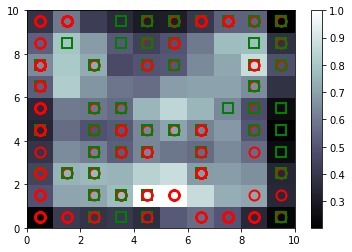

In [12]:
from pylab import bone,pcolor, colorbar ,plot , show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors=['r','g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
        markers[Y[i]],
        markeredgecolor = colors[Y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)
show()

#### <font color = blue> Find the Cheat Customers

In [14]:
mappings = som.win_map(X)
frauds=np.concatenate((mappings[(5,1)],mappings[(6,2)]), axis=0)
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5801473e+07, 0.0000000e+00, 2.0830000e+01, 5.0000000e-01,
        1.0000000e+00, 1.0000000e+01, 2.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.6000000e+02, 1.0000000e+00],
       [1.5716082e+07, 0.0000000e+00, 2.2250000e+01, 1.2500000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 3.2500000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.8000000e+02, 1.0000000e+00],
       [1.5752344e+07, 0.0000000e+00, 2.1080000e+01, 5.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5779207e+07, 0.0000000e+00, 2.7330000e+01, 1.6650000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<b>©</b>Amir Ali